In [13]:
# importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [15]:
# providing path in which different sales data is stored and combining in a single file "data_list"
data_path = r'D:\Python\PKC_23\Exploratory_Data_Analysis_Sales\sales-data'
data_list=[]
for file in os.listdir(data_path):
    data_list.append(pd.read_csv(os.path.join(data_path,file)))
data_frame= pd.concat(data_list)

In [16]:
data_frame.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


In [18]:
# gives data overview
data_frame.info()

<class 'pandas.core.frame.DataFrame'>
Index: 205233 entries, 0 to 11685
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Order ID          204629 non-null  object
 1   Product           204629 non-null  object
 2   Quantity Ordered  204629 non-null  object
 3   Price Each        204629 non-null  object
 4   Order Date        204629 non-null  object
 5   Purchase Address  204629 non-null  object
dtypes: object(6)
memory usage: 11.0+ MB


In [23]:
#count null values
data_frame.isnull().sum()

Order ID            604
Product             604
Quantity Ordered    604
Price Each          604
Order Date          604
Purchase Address    604
dtype: int64

In [47]:
#count duplicate values
data_frame.duplicated().sum()

19545

In [49]:
# count duplicate order ID
data_frame[data_frame.duplicated(subset=['Order ID'])].shape

(26794, 6)

In [50]:
#show duplicate order ID
data_frame[data_frame['Order ID'].duplicated(keep=False)].sort_values(by=['Order ID'])

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
41,141275,USB-C Charging Cable,1,11.95,01/07/19 16:06,"610 Walnut St, Austin, TX 73301"
42,141275,Wired Headphones,1,11.99,01/07/19 16:06,"610 Walnut St, Austin, TX 73301"
58,141290,AA Batteries (4-pack),3,3.84,01/02/19 08:25,"4 1st St, Los Angeles, CA 90001"
57,141290,Apple Airpods Headphones,1,150,01/02/19 08:25,"4 1st St, Los Angeles, CA 90001"
134,141365,Wired Headphones,1,11.99,01/10/19 11:19,"20 Dogwood St, New York City, NY 10001"
...,...,...,...,...,...,...
10012,NaN,NaN,NaN,NaN,NaN,NaN
10274,NaN,NaN,NaN,NaN,NaN,NaN
10878,NaN,NaN,NaN,NaN,NaN,NaN
11384,NaN,NaN,NaN,NaN,NaN,NaN


In [39]:
# cells with order ID = Nan
data_frame[data_frame['Order ID'].isnull()]

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1,NaN,NaN,NaN,NaN,NaN,NaN
356,NaN,NaN,NaN,NaN,NaN,NaN
735,NaN,NaN,NaN,NaN,NaN,NaN
1433,NaN,NaN,NaN,NaN,NaN,NaN
1553,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...
10012,NaN,NaN,NaN,NaN,NaN,NaN
10274,NaN,NaN,NaN,NaN,NaN,NaN
10878,NaN,NaN,NaN,NaN,NaN,NaN
11384,NaN,NaN,NaN,NaN,NaN,NaN


In [40]:
#drop all NaN values
df2= data_frame.dropna()

In [41]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 204629 entries, 0 to 11685
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Order ID          204629 non-null  object
 1   Product           204629 non-null  object
 2   Quantity Ordered  204629 non-null  object
 3   Price Each        204629 non-null  object
 4   Order Date        204629 non-null  object
 5   Purchase Address  204629 non-null  object
dtypes: object(6)
memory usage: 10.9+ MB


In [42]:
# null values is dataFrame "df2"
df2.isnull().sum()

Order ID            0
Product             0
Quantity Ordered    0
Price Each          0
Order Date          0
Purchase Address    0
dtype: int64

In [60]:
# count duplicate values
df2.duplicated().sum()

18942

In [54]:
# display all order IDs with duplicate entries
df2[df2['Order ID'].duplicated(keep=False)].sort_values(by=['Order ID'])

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
41,141275,USB-C Charging Cable,1,11.95,01/07/19 16:06,"610 Walnut St, Austin, TX 73301"
42,141275,Wired Headphones,1,11.99,01/07/19 16:06,"610 Walnut St, Austin, TX 73301"
58,141290,AA Batteries (4-pack),3,3.84,01/02/19 08:25,"4 1st St, Los Angeles, CA 90001"
57,141290,Apple Airpods Headphones,1,150,01/02/19 08:25,"4 1st St, Los Angeles, CA 90001"
134,141365,Wired Headphones,1,11.99,01/10/19 11:19,"20 Dogwood St, New York City, NY 10001"
...,...,...,...,...,...,...
1620,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1726,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
2945,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
2129,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address


In [56]:
#display all values with order ID as order ID
df2[df2['Order ID']=='Order ID']

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
519,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1149,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1155,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
2878,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
2893,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
...,...,...,...,...,...,...
10000,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
10387,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
11399,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
11468,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address


In [62]:
#delete entries with wrong Order ID
df2= df2[df2['Order ID']!='Order ID']

In [64]:
df2[df2['Order ID']=='Order ID']

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address


In [65]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 204239 entries, 0 to 11685
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Order ID          204239 non-null  object
 1   Product           204239 non-null  object
 2   Quantity Ordered  204239 non-null  object
 3   Price Each        204239 non-null  object
 4   Order Date        204239 non-null  object
 5   Purchase Address  204239 non-null  object
dtypes: object(6)
memory usage: 10.9+ MB


In [66]:
#converting "Quantity Ordered", "Price Each" & "Order Date" datatypes
df2['Quantity Ordered']= pd.to_numeric(df2['Quantity Ordered'])
df2['Price Each']= pd.to_numeric(df2['Price Each'])
df2['Order Date']= pd.to_datetime(df2['Order Date'])

C:\Users\ND.COM\AppData\Local\Temp\ipykernel_12484\1640591185.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Quantity Ordered']= pd.to_numeric(df2['Quantity Ordered'])
C:\Users\ND.COM\AppData\Local\Temp\ipykernel_12484\1640591185.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Price Each']= pd.to_numeric(df2['Price Each'])
C:\Users\ND.COM\AppData\Local\Temp\ipykernel_12484\1640591185.py:4: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `d

In [67]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 204239 entries, 0 to 11685
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   Order ID          204239 non-null  object        
 1   Product           204239 non-null  object        
 2   Quantity Ordered  204239 non-null  int64         
 3   Price Each        204239 non-null  float64       
 4   Order Date        204239 non-null  datetime64[ns]
 5   Purchase Address  204239 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(3)
memory usage: 10.9+ MB


In [73]:
#show duplicate values
df2[df2['Order ID'].duplicated(keep=False)].sort_values(by=['Order ID'])

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
41,141275,USB-C Charging Cable,1,11.95,2019-01-07 16:06:00,"610 Walnut St, Austin, TX 73301"
42,141275,Wired Headphones,1,11.99,2019-01-07 16:06:00,"610 Walnut St, Austin, TX 73301"
58,141290,AA Batteries (4-pack),3,3.84,2019-01-02 08:25:00,"4 1st St, Los Angeles, CA 90001"
57,141290,Apple Airpods Headphones,1,150.00,2019-01-02 08:25:00,"4 1st St, Los Angeles, CA 90001"
134,141365,Wired Headphones,1,11.99,2019-01-10 11:19:00,"20 Dogwood St, New York City, NY 10001"
...,...,...,...,...,...,...
25028,319584,Wired Headphones,1,11.99,2019-12-11 00:30:00,"537 Sunset St, Portland, OR 97035"
25040,319596,iPhone,1,700.00,2019-12-01 08:44:00,"436 14th St, New York City, NY 10001"
25041,319596,Lightning Charging Cable,1,14.95,2019-12-01 08:44:00,"436 14th St, New York City, NY 10001"
25076,319631,34in Ultrawide Monitor,1,379.99,2019-12-17 22:35:00,"363 Highland St, Austin, TX 73301"


In [159]:
#add "Month" and "Sales" column to analyze the sales in respective month
df2['Month']= df2['Order Date'].dt.month
df2['Sales']= df2['Quantity Ordered']*df2['Price Each'] 

In [160]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 204239 entries, 0 to 11685
Data columns (total 9 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   Order ID          204239 non-null  object        
 1   Product           204239 non-null  object        
 2   Quantity Ordered  204239 non-null  int64         
 3   Price Each        204239 non-null  float64       
 4   Order Date        204239 non-null  datetime64[ns]
 5   Purchase Address  204239 non-null  object        
 6   Sales             204239 non-null  float64       
 7   City              204239 non-null  object        
 8   Month             204239 non-null  int32         
dtypes: datetime64[ns](1), float64(2), int32(1), int64(1), object(4)
memory usage: 22.9+ MB


In [161]:
df2.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Sales,City,Month
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",23.90,Dallas (TX),4
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",99.99,Boston (MA),4
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",600.00,Los Angeles (CA),4
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",11.99,Los Angeles (CA),4
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",11.99,Los Angeles (CA),4


In [162]:
# splits "Purchase Address" with comma and returns second element (index 1) which is a city name
def get_city(address):
    return address.split(',')[1]
# splits "Purchase Address" with comma and return third element (index 2 ) whcih is a state and post code
# the second split, splits the state and postcode with "spaces" and returns first element (index 1) which is state 
def get_state(address):
    return address.split(',')[2].split(' ')[1]

#combine city and state in a new column named "City"
df2['City'] =  df2['Purchase Address'].apply(lambda address: get_city( address) + " " + "(" + get_state(address) + ")")


In [165]:
df2.head()

,Order ID,Product,Quantity Ordered,Price Each,Sales,Order Date,Month,Purchase Address,City
0,176558,USB-C Charging Cable,2,11.95,23.90,2019-04-19 08:46:00,4,"917 1st St, Dallas, TX 75001",Dallas (TX)
2,176559,Bose SoundSport Headphones,1,99.99,99.99,2019-04-07 22:30:00,4,"682 Chestnut St, Boston, MA 02215",Boston (MA)
3,176560,Google Phone,1,600.00,600.00,2019-04-12 14:38:00,4,"669 Spruce St, Los Angeles, CA 90001",Los Angeles (CA)
4,176560,Wired Headphones,1,11.99,11.99,2019-04-12 14:38:00,4,"669 Spruce St, Los Angeles, CA 90001",Los Angeles (CA)
5,176561,Wired Headphones,1,11.99,11.99,2019-04-30 09:27:00,4,"333 8th St, Los Angeles, CA 90001",Los Angeles (CA)


# Business Questions

## Highest Monthly Sales

In [167]:
Monthly_Sales = df2.groupby('Month')[['Sales', 'Quantity Ordered', 'Price Each']].sum()
Monthly_Sales

,Sales,Quantity Ordered,Price Each
Month,,,
1,1822256.73,10903,1811768.38
2,2202022.42,13449,2188884.72
3,2807100.38,17005,2791207.83
4,6776170.06,41097,6730174.61
5,3163166.04,18696,3145680.58
6,2577802.26,15253,2562025.61
7,2647775.76,16072,2632539.56
8,2244467.88,13448,2230345.42
9,2097560.13,13109,2084992.09


In [168]:
#convert Month column to respective name
import calendar
Monthly_Sales.index= Monthly_Sales.index.map(lambda x: calendar.month_name[x])
Monthly_Sales.head()

,Sales,Quantity Ordered,Price Each
Month,,,
January,1822256.73,10903,1811768.38
February,2202022.42,13449,2188884.72
March,2807100.38,17005,2791207.83
April,6776170.06,41097,6730174.61
May,3163166.04,18696,3145680.58


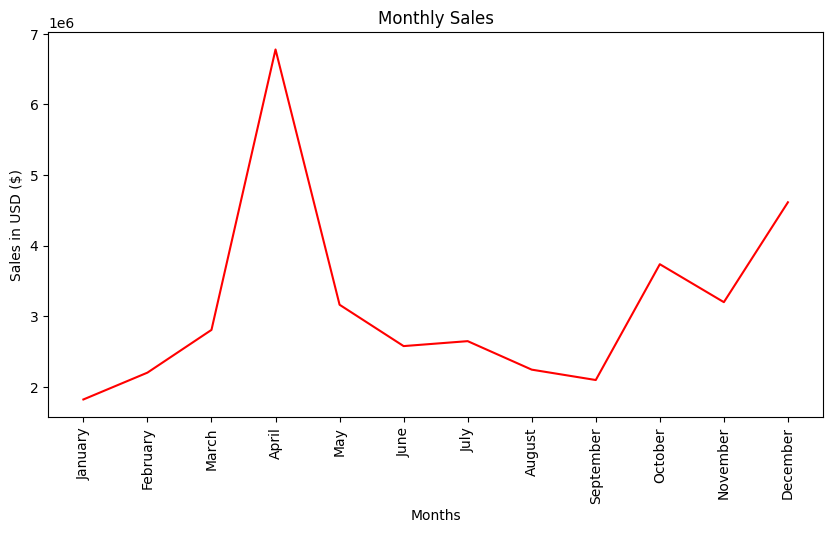

In [175]:
#plot line graph of sales over months
plt.figure(figsize=(10,5))
plt.plot(Monthly_Sales.index, Monthly_Sales['Sales'], color='r')
plt.xticks(rotation=90)
plt.xlabel('Months')
plt.ylabel('Sales in USD ($)')
plt.title('Monthly Sales')
plt.show()


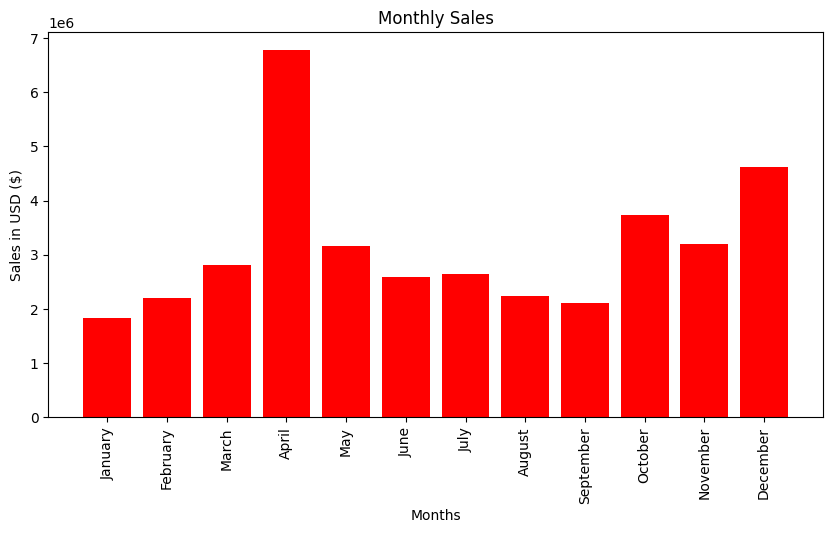

In [177]:
#plot sales bar graph with
plt.figure(figsize=(10,5))
plt.bar(Monthly_Sales.index, Monthly_Sales['Sales'], color='r')
plt.xticks(rotation=90)
plt.xlabel('Months')
plt.ylabel('Sales in USD ($)')
plt.title('Monthly Sales')
plt.show()


## Highest sales in a city